# Modern Portfolio Theory - Markowitz Model

Modern portfolio theory (Markowitz Model) combines several stocks within a portfolio to minimize the amount of risk one has to take. It relies primarily on historical data and the two main parameters one has to take into acount is the return or mean and the variance of the stocks present in the portfolio. The variable to measure the amount of risk and return taken in the portfolio is the Sharpe Ratio, this parameter measures the excess return per unit of standard deviation in an asset. Once we maximize the Sharpe Ratio we can obtain the efficient portfolio for a group of stocks.

Nevertheless modern portfolio theory just eliminates risk by increasing the diversification of stocks within a portfolio. This type of risk is called "Unsystematic Risk" (Risk specific to individual stocks). Unsystematic risk is not correlated with the market moves.

Include many stocks in your portfolio to lower risk of loss.
Each stock has a certain weight in your portfolio model

stocks = [Apple, Google, Tesla, General Electrics]

weights = [0.2,0.3,0.25,0.25]

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

In [4]:
start_date = '01/01/2010'
end_date = '01/01/2020'

In [5]:
# Download data from yahoo finance
def download_data(stocks):
    data = web.DataReader(stocks , data_source = 'yahoo',start = start_date, end = end_date)['Adj Close']
#     data.columns = stocks
    return data

In [6]:
# Show stock prices values from our data
def show_data(data):
    data.plot(figsize=(10,6))
    plt.show()

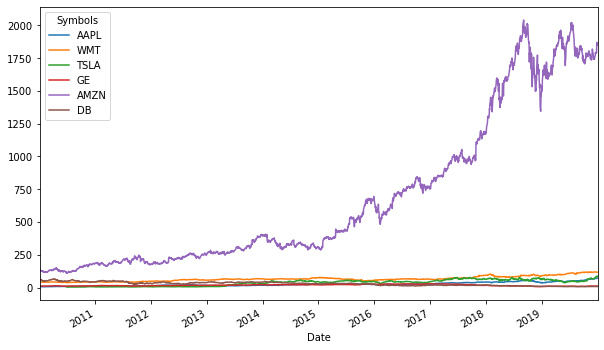

In [7]:
data_download = download_data(stocks)
show_data(data_download)

Return of certain stock $r_i$ is calculated as follows

$$r_i = \frac{stockPrice_n - stockPrice_{n-1}}{stockPrice_{n-1}}*100\%$$

or

$$r_i = log\bigg(\frac{stockPrice_n - stockPrice_{n-1}}{stockPrice_{n-1}}\bigg)$$

In [8]:
print(data_download.resample('M').last())

Symbols          AAPL         WMT       TSLA         GE         AMZN  \
Date                                                                   
2010-01-31   5.869116   40.787403        NaN  11.282297   125.410004   
2010-02-28   6.252933   41.275990        NaN  11.338601   118.400002   
2010-03-31   7.181309   42.683178        NaN  12.849473   135.770004   
2010-04-30   7.978589   41.178520        NaN  13.315442   137.100006   
2010-05-31   7.849935   39.039543        NaN  11.543346   125.459999   
...               ...         ...        ...        ...          ...   
2019-08-31  51.164417  111.882095  45.122002   8.199591  1776.290039   
2019-09-30  54.897453  116.210098  48.174000   8.894979  1735.910034   
2019-10-31  60.973743  114.819672  62.984001   9.929743  1776.660034   
2019-11-30  65.702515  116.611572  65.987999  11.213248  1800.800049   
2019-12-31  72.192863  116.888733  83.666000  11.113869  1847.839966   

Symbols            DB  
Date                   
2010-01-31  49.

In [9]:
def daily_return(data):
    return data/data.shift(1)-1

In [10]:
daily = daily_return(data_download)
daily

Symbols,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.009958,NaN,0.005178,0.005900,0.019118
2010-01-06,-0.015906,-0.002235,NaN,-0.005152,-0.018116,-0.017285
2010-01-07,-0.001849,0.000560,NaN,0.051780,-0.017013,0.011317
2010-01-08,0.006648,-0.005037,NaN,0.021538,0.027077,0.036133
...,...,...,...,...,...,...
2019-12-24,0.000951,0.004033,0.014384,0.002688,-0.002114,-0.006519
2019-12-26,0.019840,0.000084,0.013380,0.003575,0.044467,0.005249
2019-12-27,-0.000379,0.000586,-0.001300,-0.004452,0.000551,0.000000


In [11]:
def daily_returns_log(data):
    return np.log(data/data.shift(1))

In [12]:
daily_log = daily_returns_log(data_download)
daily_log

Symbols,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,-0.010007,NaN,0.005165,0.005883,0.018937
2010-01-06,-0.016034,-0.002237,NaN,-0.005165,-0.018282,-0.017436
2010-01-07,-0.001850,0.000560,NaN,0.050484,-0.017160,0.011254
2010-01-08,0.006626,-0.005050,NaN,0.021310,0.026717,0.035496
...,...,...,...,...,...,...
2019-12-24,0.000950,0.004025,0.014281,0.002685,-0.002116,-0.006540
2019-12-26,0.019646,0.000084,0.013292,0.003568,0.043506,0.005236
2019-12-27,-0.000379,0.000586,-0.001300,-0.004462,0.000551,0.000000


In [60]:
def plot_daily_returns(returns):
    returns.plot(figsize=(10,8))
    plt.show()

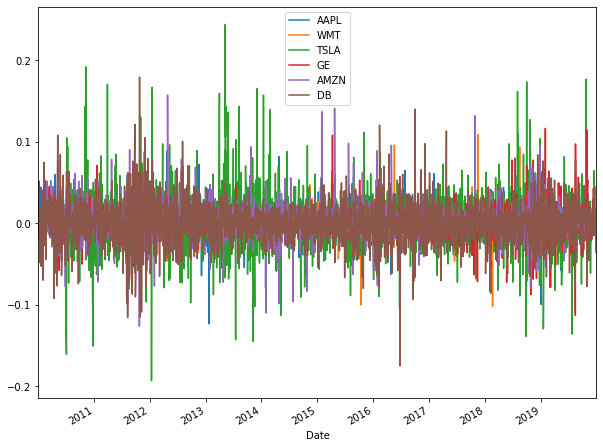

In [61]:
plot_daily_returns(daily)

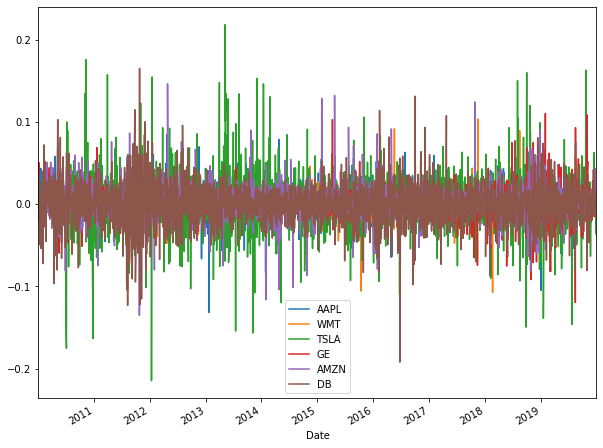

In [62]:
plot_daily_returns(daily_log)

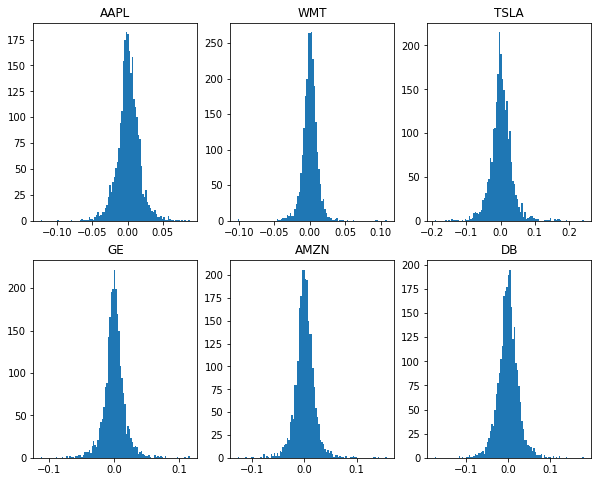

In [86]:
def plot_hists(data,stocks):
    fig = plt.figure(figsize=(10,8))
    for i,stock in enumerate(stocks):
        daily_ret = daily_return(data_download[stock])
        ax = fig.add_subplot(2,3,i+1)
#         plt.hist(daily_ret.to_list(),bins=100)
        daily_ret.hist(bins=100)
        plt.title(stock)
        plt.grid(False)
    plt.show()

plot_hists(data_download,stocks)

The mean is approximately 0, from the return plots we can see the fluctuations oscilate around the value 0 and from the histograms we see that all stocks obey a Gaussian distribution with maximum around 0.

In [88]:
datetimes = list(data.head(len(AppleData)).index.values)
dates = [np.datetime_as_string(d , unit = 'D') for d in datetimes]

In [93]:
# We print the mean and the covariance of the daily returns, we multiply by 252 because the are 252 stock exchanges 
# per year or 252 trading days within a year
def show_statistics(returns):
    print(returns.mean()*252)
    print(returns.cov()*252)
show_statistics(daily)
print(' ')
show_statistics(daily_log)

AAPL    0.273930
WMT     0.118884
TSLA    0.433087
GE      0.038547
AMZN    0.310867
DB     -0.123727
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.066298  0.010008  0.032148  0.021614  0.031701  0.033692
WMT   0.010008  0.029751  0.011598  0.010923  0.010910  0.016590
TSLA  0.032148  0.011598  0.265154  0.028338  0.044965  0.044656
GE    0.021614  0.010923  0.028338  0.069949  0.024239  0.046920
AMZN  0.031701  0.010910  0.044965  0.024239  0.095966  0.039107
DB    0.033692  0.016590  0.044656  0.046920  0.039107  0.158486
 
AAPL    0.240620
WMT     0.103998
TSLA    0.301474
GE      0.003659
AMZN    0.262990
DB     -0.203065
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.066465  0.010030  0.032112  0.021688  0.031673  0.033832
WMT   0.010030  0.029738  0.011564  0.010957  0.010929  0.016669
TSLA  0.032112  0.011564  0.262101  0.028383  0.045129  0.045099
GE    0.021688  0.010957  0.028383  0.069759  0.0

In [121]:
# Mean and covariance in matrix form:

means = (daily.mean()*252).values
cov = (daily.cov()*252).values
# print(cov.as_matrix(columns = stocks))
print(cov)
print(means)

[[0.06629773 0.01000792 0.03214792 0.02161447 0.03170122 0.03369176]
 [0.01000792 0.0297515  0.01159813 0.01092253 0.01090951 0.01658969]
 [0.03214792 0.01159813 0.26515372 0.0283376  0.04496513 0.04465648]
 [0.02161447 0.01092253 0.0283376  0.06994944 0.02423945 0.04691991]
 [0.03170122 0.01090951 0.04496513 0.02423945 0.09596617 0.03910664]
 [0.03369176 0.01658969 0.04465648 0.04691991 0.03910664 0.15848606]]
[ 0.27393     0.11888365  0.43308683  0.0385474   0.31086747 -0.12372706]


In [242]:
def initialize_weights():
    weights = np.random.random(len(stocks))
    weights /= sum(weights)
    return weights
w = initialize_weights()

Expected return $\mu_i$ for security i (mean) is based on historical data. Historical mean performance is the best estimator for future performance.

$$\mu_{portfolio} = E\bigg(\sum_i w_i r_i\bigg) = \sum_i w_i E \big( r_i\big) = \sum_i w_i \mu_i = \bar{w}^T \bar{\mu}$$

Mean is equal as passed years

In [247]:
# def calculate_portfolio_return(returns, weights):
#     return np.sum(returns.mean()*weights)*252
def calculate_portfolio_return(returns_means,weights):
    return np.dot(returns_means,weights)*252
calculate_portfolio_return(daily.mean(),w)

0.20999817423018752

Covariance:

$$ \sigma_{ij} = E[(r_i - \mu_i)(r_j - \mu_j)] $$ 

If $\sigma_{ij}<0$ then the returns of both stocks vary inversely, if one goes up, the other goes down.

If $\sigma_{ij}>0$ then the returns of both stocks vary together, if one goes up, the other two.

Variance:

$$ \sigma_{i}^2 = E[(r_i - \mu_i)^2] $$ 

Portfolio Variance:

$$ \sigma_{portfolio}^2 = \bar{w}^T\Sigma\bar{w} $$

In [249]:
def calculate_portfolio_variance(returns_cov,weights):
    return np.sqrt(np.dot(weights.T,np.dot(returns_cov*252,weights)))
calculate_portfolio_variance(daily.cov(),w)

0.2197185497290179

### Monte Carlo Simulation to determine the optimal portfolio

In [274]:
def generate_portfolios(returns):
    list_returns = []
    list_variances = []
    return_mean = returns.mean()
    return_cov = returns.cov()
    
    for i in range(80000):
        weights = initialize_weights()
        list_returns.append(calculate_portfolio_return(return_mean,weights))
        list_variances.append(calculate_portfolio_variance(return_cov,weights))
    
    return np.array(list_returns), np.array(list_variances)

In [332]:
def plot_portfolios(returns,variances):
    fig,ax = plt.subplots(figsize = (10,8))
    ax.set_xlabel('Risk',fontsize = 'large')
    ax.set_ylabel('Return',fontsize = 'large')
    s = ax.scatter(variances,returns ,s=0.8,c=returns/variances,cmap='winter')
    plt. title('Markowitz Bullet')
    plt.grid()
    fig.colorbar(s ,label = 'Sharpe Ratio')
    plt.show() 

In [ ]:
ret,var = generate_portfolios(daily)

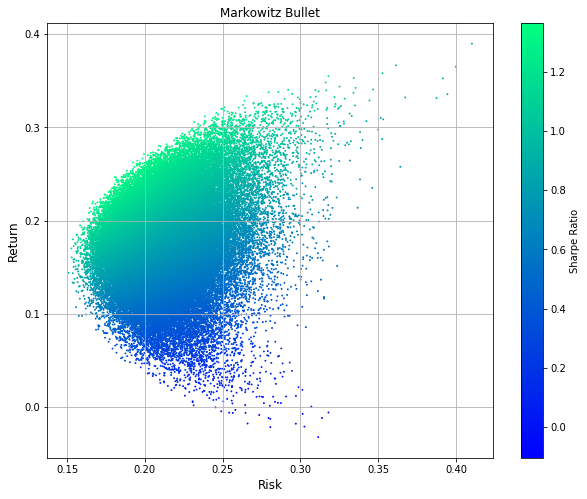

In [333]:
plot_portfolios(ret,var)

In [ ]:
ret1,var1 = generate_portfolios(daily_log)

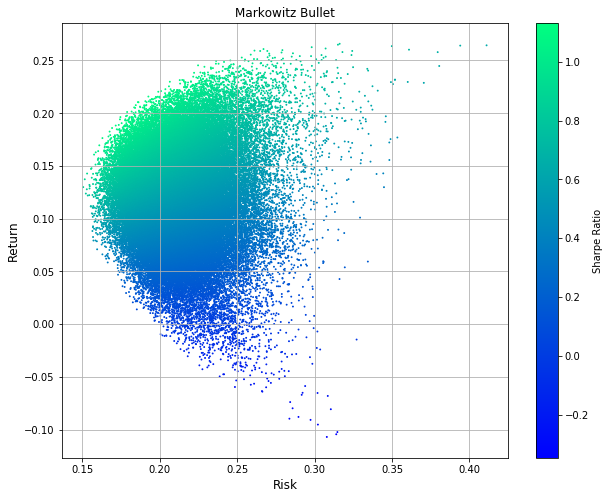

In [334]:
plot_portfolios(ret1,var1)

### Optimal Portfolio Determination

In [296]:
def statistics(weights , returns):
    portfolio_return = np.dot(returns.mean(),weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    return np.array([portfolio_return,portfolio_volatility,portfolio_return/portfolio_volatility])

In [297]:
def min_func_sharpe(weights,returns):
    return -statistics(weights,returns)[2]

In [338]:
# weights: initial guess
# returns: aditional arguments
def optimize_portfolio(weights , returns):
    constraints = {'type':'eq','fun':lambda x: np.sum(x)-1}
    bounds = tuple((0,1) for x in range(len(stocks)))
    optimum = opt.minimize(min_func_sharpe, x0 = weights , args = returns, method = 'SLSQP', bounds = bounds,\
                          constraints = constraints)
    return optimum

w = initialize_weights()
print('Using basic formula:')
optimal_portfolio = optimize_portfolio(w,daily)
print('Optimal Portfolio Weights: ',optimal_portfolio['x'].round(4))
print('Return: ', statistics(optimal_portfolio['x'],daily)[0].round(4))
print('Volatility: ',statistics(optimal_portfolio['x'],daily)[1].round(4))
print('Sharpe Ratio: ',statistics(optimal_portfolio['x'],daily)[2].round(4))
print(' ')
print('Using Ln:')
optimal_portfolio1 = optimize_portfolio(w,daily_log)
print('Optimal Portfolio Weights: ',optimal_portfolio1['x'].round(4))
print('Return: ', statistics(optimal_portfolio1['x'],daily_log)[0].round(4))
print('Volatility: ',statistics(optimal_portfolio1['x'],daily_log)[1].round(4))
print('Sharpe Ratio: ',statistics(optimal_portfolio1['x'],daily_log)[2].round(4))


Using basic formula:
Optimal Portfolio Weights:  [0.3442 0.2933 0.1282 0.     0.2343 0.    ]
Return:  0.2575
Volatility:  0.1873
Sharpe Ratio:  1.3748
 
Using Ln:
Optimal Portfolio Weights:  [0.3724 0.3078 0.0814 0.     0.2384 0.    ]
Return:  0.2089
Volatility:  0.1816
Sharpe Ratio:  1.1498


In [335]:
def plot_optimal_weights(returns,variances,opt_return,opt_volatility):
    fig,ax = plt.subplots(figsize = (10,8))
    ax.set_xlabel('Risk',fontsize = 'large')
    ax.set_ylabel('Return',fontsize = 'large')
    s = ax.scatter(variances,returns ,s=0.8,c=returns/variances,cmap='winter')
    ax.plot(opt_volatility,opt_return,marker = 'X',markersize = 13,c = 'r')
    plt. title('Markowitz Bullet')
    plt.grid()
    fig.colorbar(s ,label = 'Sharpe Ratio')
    plt.show() 
    

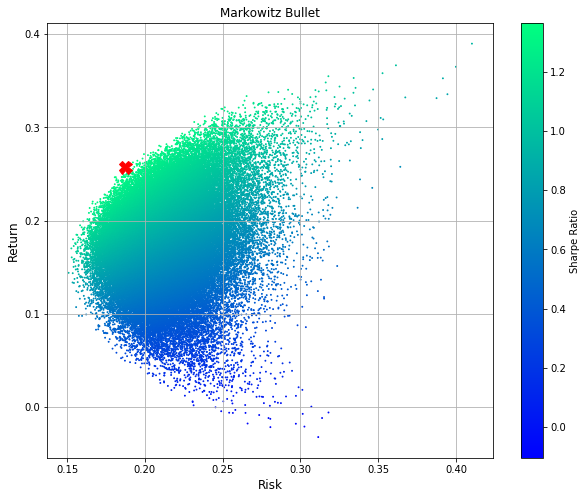

In [336]:
plot_optimal_weights(ret,var, statistics(optimal_portfolio['x'],daily)[0],statistics(optimal_portfolio['x'],daily)[1])

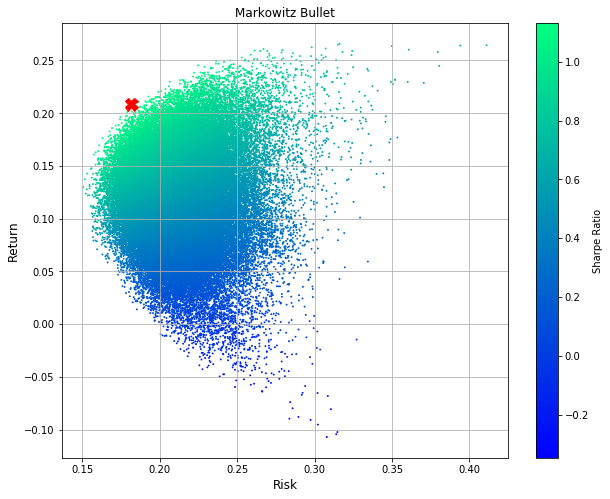

In [337]:
plot_optimal_weights(ret1,var1, statistics(optimal_portfolio1['x'],daily_log)[0],statistics(optimal_portfolio1['x'],daily_log)[1])